In [1]:
import pandas as pd
import requests

In [4]:
source = "https://www.mimuw.edu.pl/~lukaskoz/teaching/dav/labs/lab4/temperature.csv"

data = requests.get(source)
if data.status_code == 200:
    with open("../data/temperature.csv", "w") as file:
        file.write(data.text)

In [7]:
df = pd.read_csv("../data/temperature.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48470 entries, 0 to 48469
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   record_id                          48470 non-null  int64  
 1   month                              48470 non-null  int64  
 2   day                                48470 non-null  int64  
 3   year                               48470 non-null  int64  
 4   AverageTemperatureFahr             47541 non-null  float64
 5   AverageTemperatureUncertaintyFahr  47541 non-null  float64
 6   City                               47986 non-null  object 
 7   country_id                         47986 non-null  object 
 8   Country                            47986 non-null  object 
 9   Latitude                           48470 non-null  object 
 10  Longitude                          48470 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.1+ 

In [8]:
df = df.dropna(subset=['City', 'Country'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47986 entries, 0 to 48469
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   record_id                          47986 non-null  int64  
 1   month                              47986 non-null  int64  
 2   day                                47986 non-null  int64  
 3   year                               47986 non-null  int64  
 4   AverageTemperatureFahr             47068 non-null  float64
 5   AverageTemperatureUncertaintyFahr  47068 non-null  float64
 6   City                               47986 non-null  object 
 7   country_id                         47986 non-null  object 
 8   Country                            47986 non-null  object 
 9   Latitude                           47986 non-null  object 
 10  Longitude                          47986 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [9]:
df = df.dropna(subset=['AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47068 entries, 5 to 48468
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   record_id                          47068 non-null  int64  
 1   month                              47068 non-null  int64  
 2   day                                47068 non-null  int64  
 3   year                               47068 non-null  int64  
 4   AverageTemperatureFahr             47068 non-null  float64
 5   AverageTemperatureUncertaintyFahr  47068 non-null  float64
 6   City                               47068 non-null  object 
 7   country_id                         47068 non-null  object 
 8   Country                            47068 non-null  object 
 9   Latitude                           47068 non-null  object 
 10  Longitude                          47068 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.3+ MB


In [11]:
df = df[df['City'] != '']
df = df[df['Country'] != '']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47068 entries, 5 to 48468
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   record_id                          47068 non-null  int64  
 1   month                              47068 non-null  int64  
 2   day                                47068 non-null  int64  
 3   year                               47068 non-null  int64  
 4   AverageTemperatureFahr             47068 non-null  float64
 5   AverageTemperatureUncertaintyFahr  47068 non-null  float64
 6   City                               47068 non-null  object 
 7   country_id                         47068 non-null  object 
 8   Country                            47068 non-null  object 
 9   Latitude                           47068 non-null  object 
 10  Longitude                          47068 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.3+ MB


In [13]:
df = df.drop(columns=['day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47068 entries, 5 to 48468
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   record_id                          47068 non-null  int64  
 1   month                              47068 non-null  int64  
 2   year                               47068 non-null  int64  
 3   AverageTemperatureFahr             47068 non-null  float64
 4   AverageTemperatureUncertaintyFahr  47068 non-null  float64
 5   City                               47068 non-null  object 
 6   country_id                         47068 non-null  object 
 7   Country                            47068 non-null  object 
 8   Latitude                           47068 non-null  object 
 9   Longitude                          47068 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [14]:
df['AverageTemperatureCelsius'] = (df['AverageTemperatureFahr'] - 32) / 1.8
df['AverageTemperatureUncertaintyCelsius'] = (df['AverageTemperatureUncertaintyFahr'] - 32) / 1.8

# Now, drop the Fahrenheit columns
df = df.drop(columns=['AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr'])

In [15]:
df.head()

,record_id,month,year,City,country_id,Country,Latitude,Longitude,AverageTemperatureCelsius,AverageTemperatureUncertaintyCelsius
5,474381,6,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.059,2.754
6,474382,7,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.327,1.416
7,474383,8,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.585,0.861
8,474384,9,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.432,0.910
9,474385,10,1853,Auckland,NEW,New Zealand,36.17S,175.03E,12.707,1.102


In [16]:
df.to_csv('temperatures_clean.csv', index=False)

In [17]:
df = pd.read_csv('temperatures_clean.csv')

In [18]:
df.head()

,record_id,month,year,City,country_id,Country,Latitude,Longitude,AverageTemperatureCelsius,AverageTemperatureUncertaintyCelsius
0,474381,6,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.059,2.754
1,474382,7,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.327,1.416
2,474383,8,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.585,0.861
3,474384,9,1853,Auckland,NEW,New Zealand,36.17S,175.03E,11.432,0.910
4,474385,10,1853,Auckland,NEW,New Zealand,36.17S,175.03E,12.707,1.102


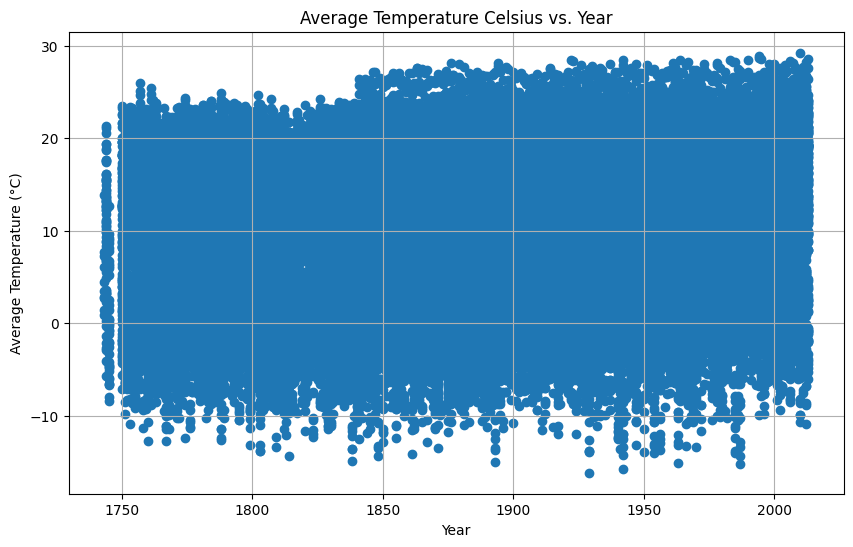

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/temperatures_clean.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['AverageTemperatureCelsius'])
plt.title('Average Temperature Celsius vs. Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature Celsius (°C)')
plt.grid(True)
plt.show()

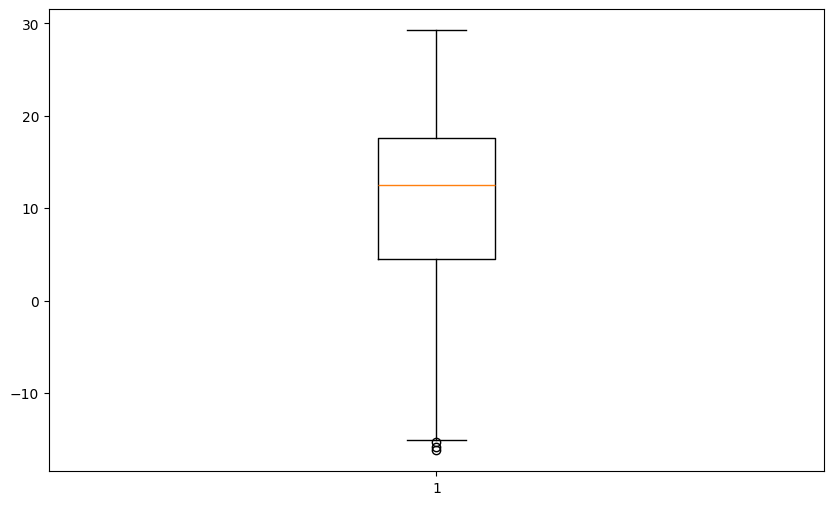

In [23]:
plt.figure(figsize=(10, 6))
# ramka-wąsy

plt.boxplot(dfdf['AverageTemperatureCelsius'])
plt.show()

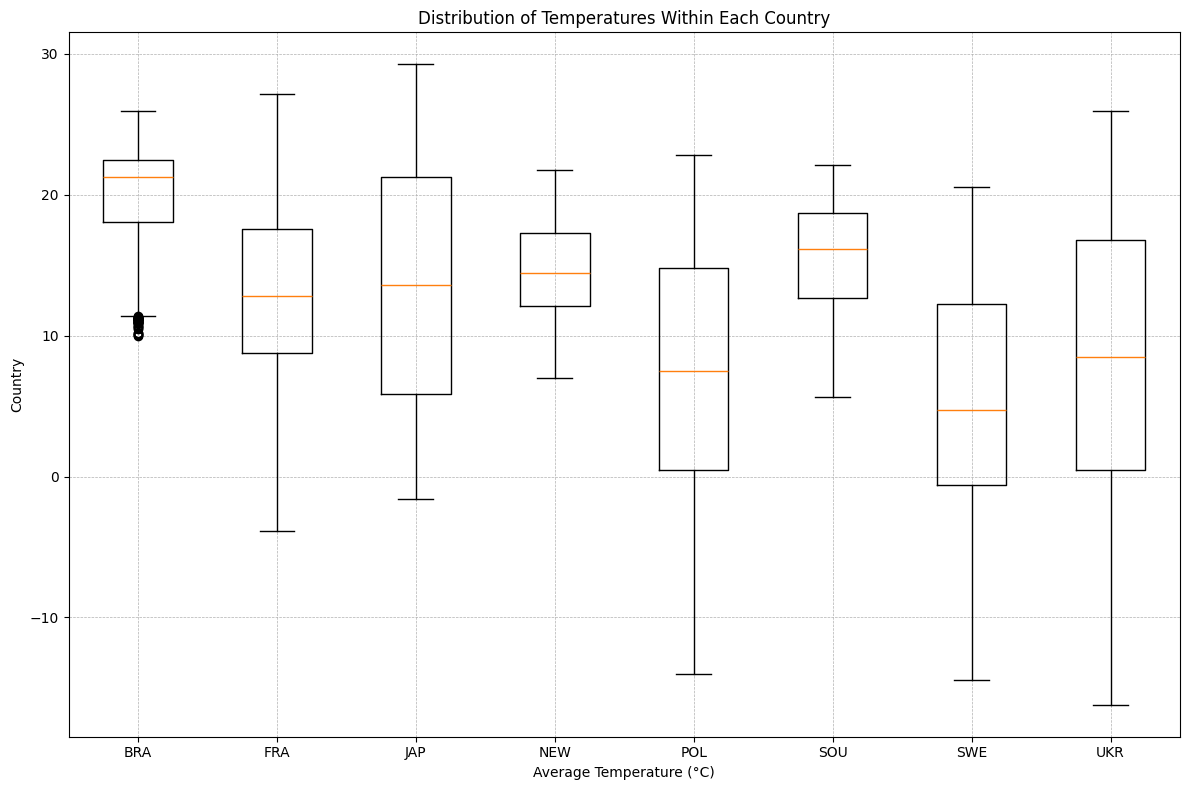

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("../data/temperatures_clean.csv")

grouped_data = df[['country_id', 'AverageTemperatureCelsius']].groupby('country_id')

data_to_plot = [group['AverageTemperatureCelsius'].values for name, group in grouped_data]

plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, labels=[name for name, group in grouped_data])
plt.title('Distribution of Temperatures Within Each Country')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() 
plt.show()